### Import the tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from clean import clean_data as cd

### Establishes the KPIs

In [2]:
# KEY METRICS

# (perf_all - Patric) Whole delivery time = DeliveryDate - OrderDate (order date to delivery)
# (perf_warehouse - Joma) Warehouse Efficiency = Truck loading - OrderDate (order date to read to ship)
# (perf_logistics - Joma) Logistics Efficiency = DeliveryDate - Truck loading (ontruck to delivery)
# (perf_pickup - Patric) Pick Up Delay = Truck loading - OrderReady (ready to ship to ontruck)

#FOR LATER

#Delay Factor = OrderDate - OrderReceive (for comparison reasons)
#Express Difference for Whole delivery Time

### Load the database

In [3]:
pd.read_excel("./data/data/Muesli Project raw data.xlsx")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
1,27,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0,11.7741
2,45,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0,19.7714
3,48,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45,3,0,4.95
4,60,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30,2,0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9894,US-2019-115441,2019-07-25 00:00:00,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.56,4,0,96.8544
9991,9908,US-2018-129007,2018-09-13 00:00:00,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.72,3,0.2,71.772
9992,9913,CA-2018-132388,2018-10-10 00:00:00,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204
9993,9920,CA-2019-149272,2019-03-15 00:00:00,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,77803,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.43,5,0.3,-143.431


In [4]:
orders = pd.read_excel("./data/data/Muesli Project raw data.xlsx", sheet_name="Orders", header=1)
campaign = pd.read_excel("./data/data/Muesli Project raw data.xlsx", sheet_name="Campaign Data")
process = pd.read_excel("./data/data/Muesli Project raw data.xlsx", sheet_name="Order Process Data")
intern = pd.read_excel("./data/data/Muesli Project raw data.xlsx", sheet_name="InternData Study")

### Call the clean.py functions

In [5]:
cd(orders, campaign, process, intern)

(      index        order_id order_date       ship_mode customer_id  \
 0        27  CA-2019-121755 2019-01-16    Second Class    EH-13945   
 1        45  CA-2019-118255 2019-03-11     First Class    ON-18715   
 2        48  CA-2019-169194 2019-06-20  Standard Class    LH-16900   
 3        60  CA-2019-111682 2019-06-17     First Class    TB-21055   
 4        63  CA-2018-135545 2018-11-24  Standard Class    KM-16720   
 ...     ...             ...        ...             ...         ...   
 9979   9760  CA-2019-146913 2019-10-31  Standard Class    SF-20965   
 9980   9787  US-2017-114377 2017-11-05     First Class    BG-11035   
 9984   9808  CA-2020-107209 2020-07-27    Second Class    JW-15955   
 9986   9830  US-2020-152842 2020-07-16  Standard Class    NF-18385   
 9988   9880  CA-2019-122581 2019-08-21  Standard Class    JK-15370   
 
          customer_name origin_channel country/region           city  \
 0        Eric Hoffmann          Email  United States    Los Angeles   
 1

### Merging columns ('campaign' with 'process')

In [6]:
camp_pro = campaign.merge(process)

### Date Range of all Frames

In [7]:
camp_pro["perf_logistics"] = (camp_pro["arrival_scan_date"] - camp_pro["on_truck_scan_date"])
process["perf_warehouse"] = (process["on_truck_scan_date"] - process["order_date"])

In [8]:
camp_pro["perf_logistics_bus"] = np.busday_count(camp_pro["on_truck_scan_date"].values.astype("datetime64[D]"), camp_pro["arrival_scan_date"].values.astype("datetime64[D]"))
camp_pro["perf_logistics_bus"] = pd.to_timedelta(camp_pro["perf_logistics_bus"], unit="D")
process["perf_warehouse_bus"] = np.busday_count(process["order_date"].values.astype("datetime64[D]"), process["on_truck_scan_date"].values.astype("datetime64[D]"))
process["perf_warehouse_bus"] = pd.to_timedelta(process["perf_warehouse_bus"], unit="D")

### Calculate averages

In [9]:
print("Logistics Efficiency (ontruck to delivery): ", camp_pro["perf_logistics"].mean())
print("Warehouse Efficiency (order date to read to ship): ", process["perf_warehouse"].mean())
print("Logistics Efficiency (ontruck to delivery): ", camp_pro["perf_logistics_bus"].mean())
print("Warehouse Efficiency (order date to read to ship): ", process["perf_warehouse_bus"].mean())

Logistics Efficiency (ontruck to delivery):  4 days 14:29:11.351351351
Warehouse Efficiency (order date to read to ship):  6 days 02:32:03.517654896
Logistics Efficiency (ontruck to delivery):  2 days 22:07:34.054054054
Warehouse Efficiency (order date to read to ship):  4 days 07:57:45.689540306


### Plotting results

<Axes: xlabel='perf_warehouse', ylabel='count'>

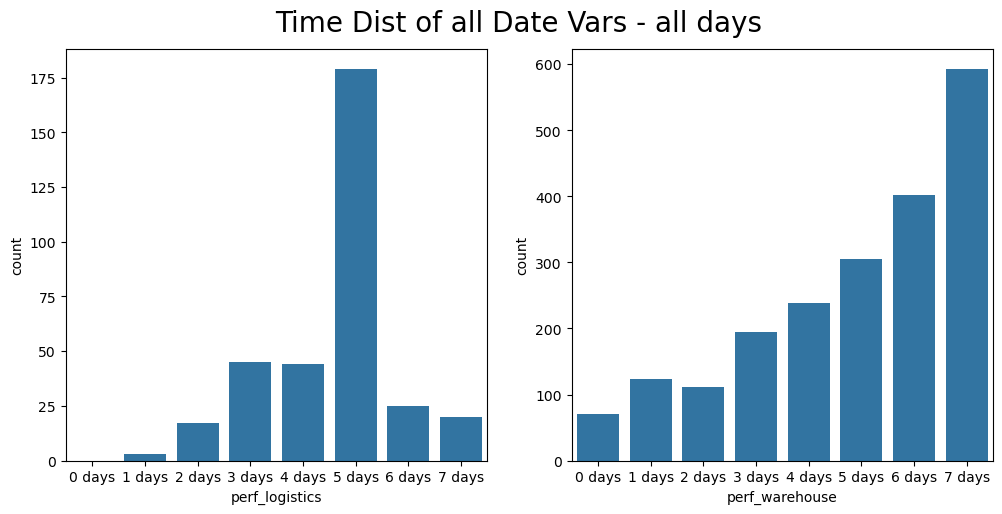

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10, 5)) # 
plt.suptitle('Time Dist of all Date Vars - all days', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.countplot(ax=ax[0], x = 'perf_logistics', data=camp_pro, order=['{} days'.format(i) for i in range(8)])
sns.countplot(ax=ax[1], x = 'perf_warehouse', data=process, order=['{} days'.format(i) for i in range(8)])

In [11]:
print(camp_pro["perf_logistics"].dt.days.skew())
print(process["perf_warehouse"].dt.days.skew())

-0.493764155800554
-0.5872913249419629


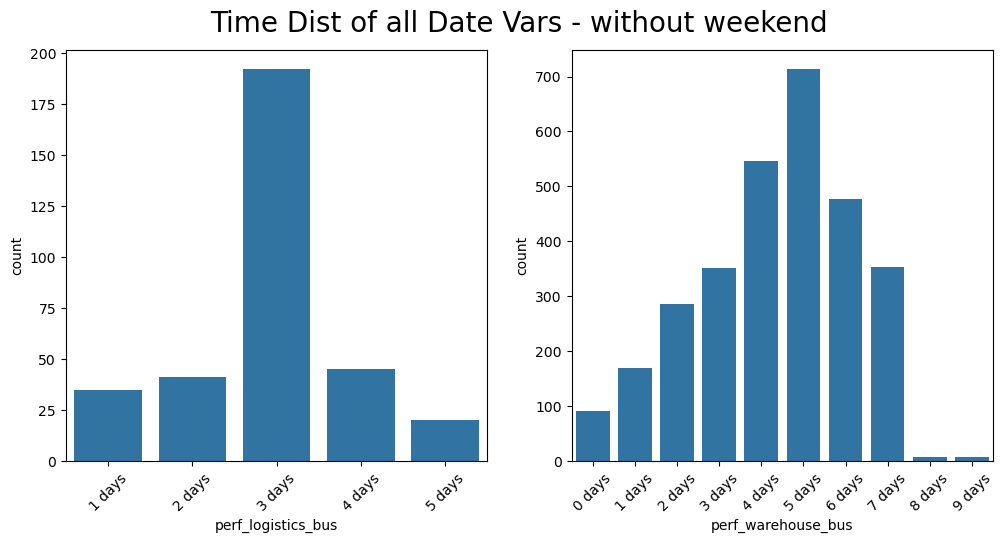

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10, 5)) # 
plt.suptitle('Time Dist of all Date Vars - without weekend', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.countplot(ax=ax[0], x = 'perf_logistics_bus', data=camp_pro, order=sorted(camp_pro['perf_logistics_bus'].unique()))
ax[0].tick_params(axis='x', rotation=45)
sns.countplot(ax=ax[1], x = 'perf_warehouse_bus', data=process, order=sorted(process['perf_warehouse_bus'].unique()))
ax[1].tick_params(axis='x', rotation=45)

In [13]:
print(camp_pro["perf_logistics_bus"].dt.days.skew())
print(process["perf_warehouse_bus"].dt.days.skew())

-0.15441032852052292
-0.4199165120436643


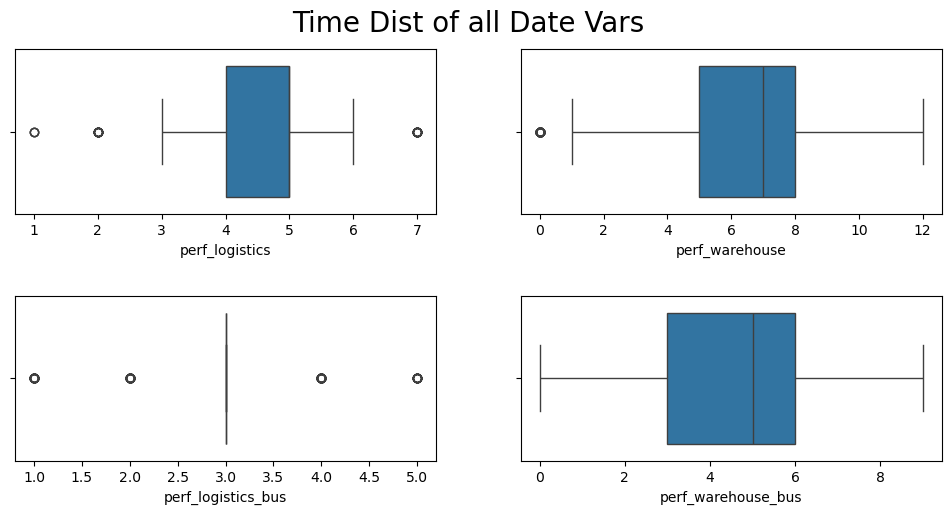

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5)) # 
plt.suptitle('Time Dist of all Date Vars', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.boxplot(x=camp_pro['perf_logistics'].dt.days, ax=ax[0][0])
sns.boxplot(x=process['perf_warehouse'].dt.days, ax=ax[0][1])
sns.boxplot(x=camp_pro['perf_logistics_bus'].dt.days, ax=ax[1][0])
sns.boxplot(x=process['perf_warehouse_bus'].dt.days, ax=ax[1][1])

plt.show()


In [15]:
camp_pro['perf_logistics_bus'] = camp_pro['perf_logistics_bus'] / pd.Timedelta(days=1)
process['perf_warehouse_bus'] = process['perf_warehouse_bus'] / pd.Timedelta(days=1)

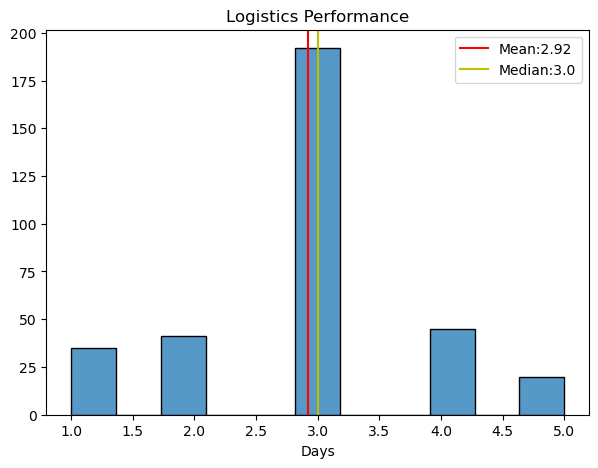

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5)) 
sns.histplot(x=camp_pro['perf_logistics_bus'], bins=11)
ax.axvline(x=camp_pro['perf_logistics_bus'].mean(),label=f'Mean:{round(camp_pro['perf_logistics_bus'].mean(),2)}', color='r')
ax.axvline(x=camp_pro['perf_logistics_bus'].median(),label=f'Median:{round(camp_pro['perf_logistics_bus'].median(),2)}', color='y')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='Days')
ax.set_title('Logistics Performance')
ax.legend()
plt.show();

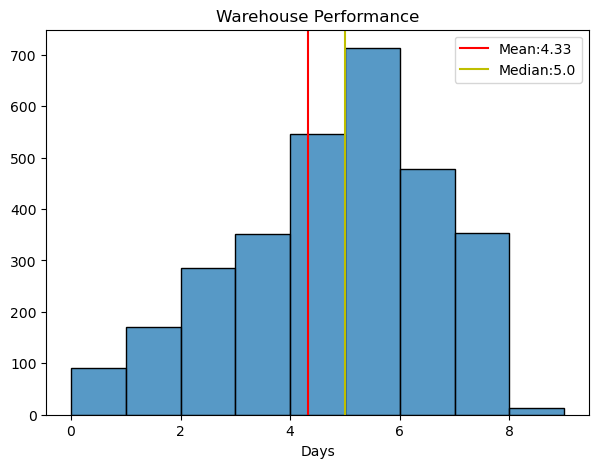

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5)) 
sns.histplot(x=process['perf_warehouse_bus'], bins=9)
ax.axvline(x=process['perf_warehouse_bus'].mean(),label=f'Mean:{round(process['perf_warehouse_bus'].mean(),2)}', color='r')
ax.axvline(x=process['perf_warehouse_bus'].median(),label=f'Median:{round(process['perf_warehouse_bus'].median(),2)}', color='y')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='Days')
ax.set_title('Warehouse Performance')
ax.legend()
plt.show();